# WINE QUALITY PREDICTION

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [25]:
import os
for dirname, _, filenames in os.walk('winequality-red.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [26]:
wines_df = pd.read_csv("winequality-red.csv")
wines_df.sample(frac=1).reset_index(drop=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
1,9.2,0.430,0.52,2.3,0.083,14.0,23.0,0.99760,3.35,0.61,11.3,6
2,10.7,0.430,0.39,2.2,0.106,8.0,32.0,0.99860,2.89,0.50,9.6,5
3,7.8,0.645,0.00,2.0,0.082,8.0,16.0,0.99640,3.38,0.59,9.8,6
4,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,10.8,0.260,0.45,3.3,0.060,20.0,49.0,0.99720,3.13,0.54,9.6,5
1595,5.6,0.500,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5
1596,11.9,0.570,0.50,2.6,0.082,6.0,32.0,1.00060,3.12,0.78,10.7,6
1597,9.2,0.560,0.18,1.6,0.078,10.0,21.0,0.99576,3.15,0.49,9.9,5


In [27]:
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
display(wines_df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

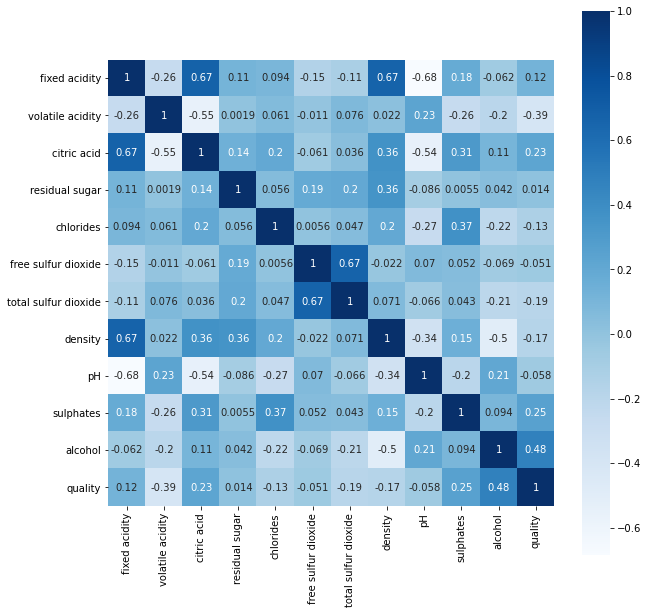

In [29]:
correlation = wines_df.corr()
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

In [30]:
wines_df_before = wines_df
wines_df_after = wines_df.drop(['fixed acidity','citric acid','density'], axis = 1)

X1 = sm.tools.add_constant(wines_df_before)
X2 = sm.tools.add_constant(wines_df_after)

series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

display(series_before)
display(series_after)

wines_df = wines_df_after

const                   1.711696e+06
fixed acidity           7.772051e+00
volatile acidity        1.879663e+00
citric acid             3.131055e+00
residual sugar          1.703859e+00
chlorides               1.500591e+00
free sulfur dioxide     1.968010e+00
total sulfur dioxide    2.214467e+00
density                 6.346491e+00
pH                      3.339511e+00
sulphates               1.487286e+00
alcohol                 3.238899e+00
quality                 1.563848e+00
dtype: float64

const                   672.114828
volatile acidity          1.321382
residual sugar            1.073584
chlorides                 1.360177
free sulfur dioxide       1.901710
total sulfur dioxide      1.999505
pH                        1.280173
sulphates                 1.379674
alcohol                   1.463216
quality                   1.561599
dtype: float64

In [31]:
x = np.array(wines_df.loc[:, wines_df.columns != 'quality'])
y = np.array(wines_df['quality'])

In [32]:
desc_df = wines_df.describe()
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)
desc_df

,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,2.538806,0.087467,15.874922,46.467792,3.311113,0.658149,10.422983,5.636023
std,0.179060,1.409928,0.047065,10.460157,32.895324,0.154386,0.169507,1.065668,0.807569
min,0.120000,0.900000,0.012000,1.000000,6.000000,2.740000,0.330000,8.400000,3.000000
25%,0.390000,1.900000,0.070000,7.000000,22.000000,3.210000,0.550000,9.500000,5.000000
50%,0.520000,2.200000,0.079000,14.000000,38.000000,3.310000,0.620000,10.200000,6.000000
75%,0.640000,2.600000,0.090000,21.000000,62.000000,3.400000,0.730000,11.100000,6.000000
max,1.580000,15.500000,0.611000,72.000000,289.000000,4.010000,2.000000,14.900000,8.000000
+3_std,1.065000,6.768590,0.228662,47.255393,145.153766,3.774273,1.166670,13.619986,8.058731
-3_std,-0.009359,-1.690979,-0.053729,-15.505549,-52.218181,2.847954,0.149628,7.225980,3.213314


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
print(x_train.shape, x_test.shape)

(1439, 8) (160, 8)


In [34]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [35]:
y_predict = regression_model.predict(x_test)
y_predict = np.round(y_predict)
sum = 0
for i,n in enumerate(y_test):
    if n == y_predict[i]:
        sum += 1
print(sum/len(y_test))

0.71875
